In [327]:
from pathlib import Path
import pandas as pd
import numpy as np

In [328]:
processed = Path('../data/processed')
selection_data = pd.read_pickle(Path(processed) / 'selection_data.pkl')

In [329]:
selection_data = selection_data[selection_data.year >= 2010]

In [330]:
selection_data[['spot', 'home']].value_counts()

spot  home
1.0   1.0     1269
      0.0      839
2.0   1.0      542
3.0   1.0      440
2.0   0.0      306
3.0   0.0      241
4.0   1.0       86
      0.0       39
5.0   1.0       12
      0.0        3
dtype: int64

In [331]:
def adjust_plot(plt):
    plt.xaxis.grid(False)
    plt.yaxis.grid(True, linestyle='dashed', color='lightgrey')
    plt.set_axisbelow(True)
    plt.xaxis.set_ticks_position('none') 
    plt.yaxis.set_ticks_position('none') 

    plt.spines['right'].set_visible(False)
    plt.spines['top'].set_visible(False)

In [332]:
Wins = selection_data.loc[selection_data['Win'] == True, 'Win'].count()
Loses = selection_data.loc[selection_data['Win'] == False, 'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

77.0%


In [333]:
def streak_counter(df):
    df['L_Win'] = df['Win'].shift(1)
    df['L_year'] = df['year'].shift(1)
    df['start_of_streak'] = (df['Win'] != df['L_Win']) | (df['year'] != df['L_year'])
    df['streak_id'] = df['start_of_streak'].cumsum()
    df['streak_counter'] = df.groupby('streak_id').cumcount() + 1
    df.loc[df.Win == 0, 'streak_counter'] = 0
    
    return df

In [334]:
selection_data = selection_data.astype({'Win':'int8'})
selection_data = streak_counter(selection_data)
streaks = selection_data.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

26

In [335]:
year_results = selection_data.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2010.0,0.769444,18
2011.0,0.770667,26
2012.0,0.767507,19
2013.0,0.780556,19
2014.0,0.736413,15
2015.0,0.787709,16
2016.0,0.759777,16
2017.0,0.748603,15
2018.0,0.793734,24


In [336]:
selection_data['EstProb'].describe()

count    3777.000000
mean        0.759785
std         0.016051
min         0.685019
25%         0.749047
50%         0.758323
75%         0.769495
max         0.826686
Name: EstProb, dtype: float64

<AxesSubplot:xlabel='EstProb', ylabel='Win'>

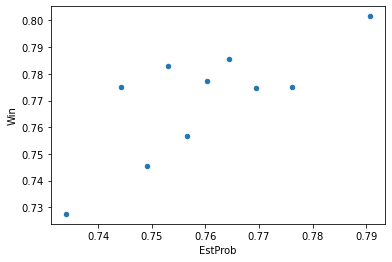

In [337]:
selection_data['bin'] = pd.qcut(selection_data['EstProb'], 10)

dots = selection_data.groupby(['bin'])[['EstProb', 'Win']].agg('mean')
dots = dots.reset_index()
dots.plot.scatter('EstProb','Win')

In [338]:
# Relief pitchers data

# Reduce noise by using rolling windows to calculate moving averages over seasons for park records, batting records, and pitching records.
# Improve to weighted averages

# Start including data from current season

# Relief pitchers data

# Game Scores/ELOs

# Team ratings

# Better Pitcher overall ratings

# Merge in 538 ELO ratings


# Set up S3 if necessary for size, or for GPUs

# Check # training observations for each model fit 
# and make sure we aren't losing any

# Ensemble methods for NN and logistic

# Rest days

# Adjust Pitcher and Batter stats for park record ( merge it in and divide) - compare adjusted at home and away stats

# New pitcher flag?

# Find out where they are in the rotation

# Fix training so that it doesn't need to specify number of variables

# Split up grid search vs. non-grid search training

# optimal skip strategy

# Why is Win missing? Check merge loss

In [339]:
restricted = selection_data.loc[
    (selection_data['park_factor'] >= 1),
    ['Win', 'year']
]

In [340]:
restricted= restricted.astype({'Win':'int8'})
restricted = streak_counter(restricted)
streaks = restricted.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

28

In [341]:
Wins = restricted.loc[
    (restricted['Win'] == True),
    'Win'].count()
Loses = restricted.loc[
    (restricted['Win'] == False),
    'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

78.0%


In [342]:
selection_data = selection_data.sort_values(['year', 'Date'])

In [343]:
selection_data['pick_day'] = selection_data.groupby(['year']).cumcount() + 1
selection_data['pick_day'] = np.ceil(selection_data['pick_day'] / 2)

In [344]:
print(selection_data['pick_day'].value_counts().sort_index().to_string())

1.0      22
2.0      22
3.0      22
4.0      22
5.0      22
6.0      22
7.0      22
8.0      22
9.0      22
10.0     22
11.0     22
12.0     22
13.0     22
14.0     22
15.0     22
16.0     22
17.0     22
18.0     22
19.0     22
20.0     22
21.0     22
22.0     22
23.0     22
24.0     22
25.0     22
26.0     22
27.0     22
28.0     22
29.0     22
30.0     22
31.0     22
32.0     22
33.0     22
34.0     22
35.0     22
36.0     22
37.0     22
38.0     22
39.0     22
40.0     22
41.0     22
42.0     22
43.0     22
44.0     22
45.0     22
46.0     22
47.0     22
48.0     22
49.0     22
50.0     22
51.0     22
52.0     22
53.0     22
54.0     22
55.0     22
56.0     22
57.0     22
58.0     22
59.0     22
60.0     22
61.0     22
62.0     22
63.0     22
64.0     22
65.0     22
66.0     22
67.0     22
68.0     20
69.0     20
70.0     20
71.0     20
72.0     20
73.0     20
74.0     20
75.0     20
76.0     20
77.0     20
78.0     20
79.0     20
80.0     20
81.0     20
82.0     20
83.0     20
84.0